In [1]:
import pandas as pd

pd.set_option("display.width", 5000)
import seaborn as sns
import matplotlib.pyplot as plt

from utils.utils import plot_scores

df_wikieval_gen = pd.read_csv("eval-judges-gen-wikieval-judgement-cr-fixed.csv")
df_sovanta_gen = pd.read_csv("eval-judges-gen-sov-2025-06-15_12_18_38-fixed-cr.csv")

wikieval_cols = [
    col
    for col in df_wikieval_gen.columns
    if ("judgement" in col or "relevance" in col or "groundedness" in col) and "_meta" not in col
]
sovanta_cols = [
    col
    for col in df_sovanta_gen.columns
    if ("judgement" in col or "relevance" in col or "groundedness" in col) and "_meta" not in col
]
judges = [
    "gpt-4o-mini",
    "gpt-4o",
    "meta--llama3.1-70b-instruct",
    "mistralai--mistral-large-instruct",
    "anthropic--claude-3.7-sonnet",
]
sovanta_judges = ["meta--llama3.1-70b-instruct", "mistralai--mistral-large-instruct"]

Note: For wikieval we only consider normal groundedness, since there are no abstentions
# 1. Failure Rate

In [2]:
print("----------- Wikieval Data  ------------")
for col in wikieval_cols:
    fails = 0
    df_f = df_wikieval_gen[(df_wikieval_gen[col].isna()) | (df_wikieval_gen[col] == -1)]
    print(f"Failure rate of {col}: {len(df_f) / len(df_wikieval_gen)}")
print("----------- sovanta Data  ------------")
for col in sovanta_cols:
    fails = 0
    df_f = df_sovanta_gen[(df_sovanta_gen[col].isna()) | (df_sovanta_gen[col] == -1)]
    print(f"Failure rate of {col}: {len(df_f) / len(df_wikieval_gen)}")

----------- Wikieval Data  ------------
Failure rate of gpt-4o-mini_answer_relevance_with_cot: 0.0
Failure rate of gpt-4o-mini_groundedness_filter_trivial: 0.004166666666666667
Failure rate of gpt-4o-mini_answer_relevance: 0.0
Failure rate of gpt-4o-mini_groundedness: 0.008333333333333333
Failure rate of gpt-4o_answer_relevance_with_cot: 0.0
Failure rate of gpt-4o_groundedness_filter_trivial: 0.004166666666666667
Failure rate of gpt-4o_answer_relevance: 0.0
Failure rate of gpt-4o_groundedness: 0.0125
Failure rate of meta--llama3.1-70b-instruct_answer_relevance_with_cot: 0.0
Failure rate of meta--llama3.1-70b-instruct_groundedness_filter_trivial: 0.0
Failure rate of meta--llama3.1-70b-instruct_answer_relevance: 0.0
Failure rate of meta--llama3.1-70b-instruct_groundedness: 0.0
Failure rate of mistralai--mistral-large-instruct_answer_relevance_with_cot: 0.0
Failure rate of mistralai--mistral-large-instruct_groundedness_filter_trivial: 0.0
Failure rate of mistralai--mistral-large-instruct_

# 2. LLM-as-a-judge without reference
## 2.1 Wikieval

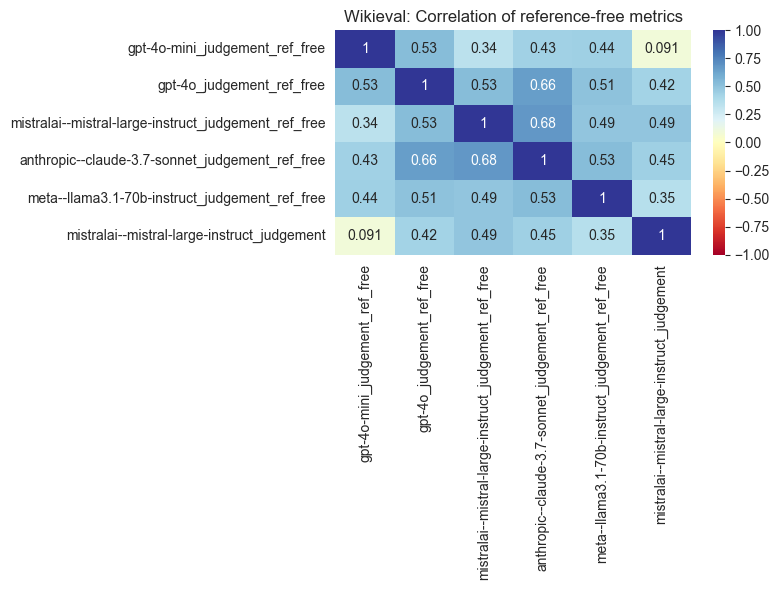

In [3]:
ref_free_cols = [col for col in df_wikieval_gen.columns if "ref_free" in col] + [
    "mistralai--mistral-large-instruct_judgement"
]
corr_context = df_wikieval_gen[ref_free_cols].corr()
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
sns.heatmap(
    corr_context,
    annot=True,
    cmap="RdYlBu",
    vmin=-1,
    vmax=1,
    xticklabels=ref_free_cols,
    yticklabels=ref_free_cols,
    ax=ax1,
)
ax1.set_title("Wikieval: Correlation of reference-free metrics")
plt.tight_layout()
plt.show()

## 2.2 sovanta

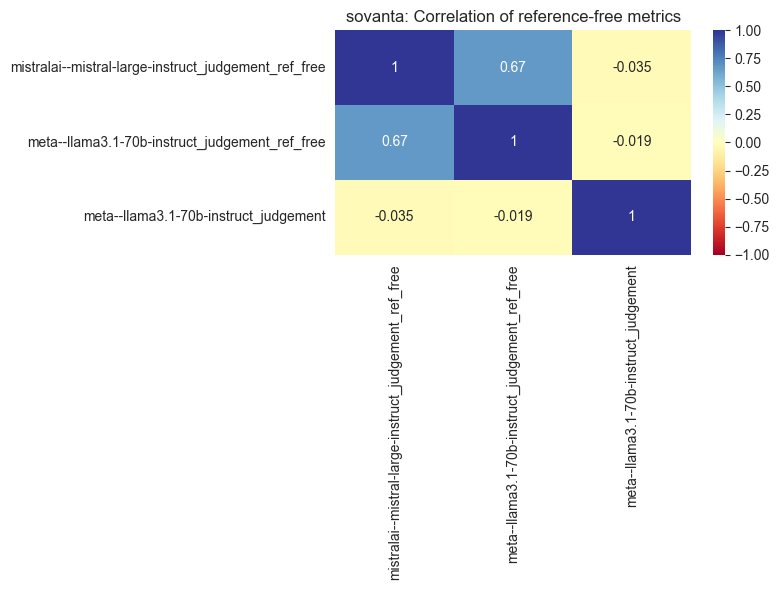

In [4]:
ref_free_cols = [col for col in df_sovanta_gen.columns if "ref_free" in col] + ["meta--llama3.1-70b-instruct_judgement"]
corr_context = df_sovanta_gen[ref_free_cols].corr()
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
sns.heatmap(
    corr_context,
    annot=True,
    cmap="RdYlBu",
    vmin=-1,
    vmax=1,
    xticklabels=ref_free_cols,
    yticklabels=ref_free_cols,
    ax=ax1,
)
ax1.set_title("sovanta: Correlation of reference-free metrics")
plt.tight_layout()
plt.show()

# 3. Groundedness
## 3.1 Wikieval

In [5]:
correlations = []
print("Average Values:")
for col in [col for col in wikieval_cols if "groundedness" in col]:
    print(f"{col}: {df_wikieval_gen[col].mean()}")
    corr = df_wikieval_gen["mistralai--mistral-large-instruct_judgement"].corr(df_wikieval_gen[col])
    correlations.append((col, corr))
correlations.sort(key=lambda x: x[1], reverse=True)
print("--------\nCorrelations with Mistral-Judgement:")
for col, corr in correlations:
    print(f"{col}: {corr}")

Average Values:
gpt-4o-mini_groundedness_filter_trivial: 0.9665655691772317
gpt-4o-mini_groundedness: 0.9562028451617259
gpt-4o_groundedness_filter_trivial: 0.9679007408905113
gpt-4o_groundedness: 0.9664946979586752
meta--llama3.1-70b-instruct_groundedness_filter_trivial: 0.9928309537684539
meta--llama3.1-70b-instruct_groundedness: 0.9574590968540077
mistralai--mistral-large-instruct_groundedness_filter_trivial: 0.9692279973083735
mistralai--mistral-large-instruct_groundedness: 0.9647403577549445
anthropic--claude-3.7-sonnet_groundedness_filter_trivial: 0.9969848284431618
anthropic--claude-3.7-sonnet_groundedness: 0.9892128921046424
--------
Correlations with Mistral-Judgement:
anthropic--claude-3.7-sonnet_groundedness_filter_trivial: -0.1172065730569832
meta--llama3.1-70b-instruct_groundedness_filter_trivial: -0.2210522645198584
anthropic--claude-3.7-sonnet_groundedness: -0.27157773241432137
gpt-4o_groundedness_filter_trivial: -0.28617559825293787
gpt-4o_groundedness: -0.3275085928954

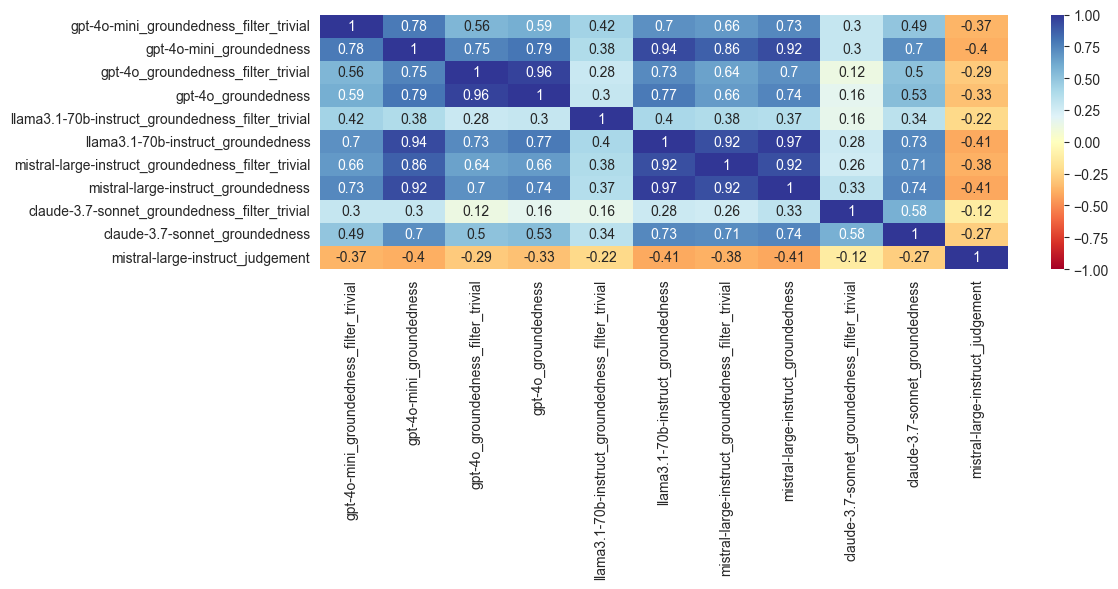

In [6]:
context_rel_cols = [col for col in wikieval_cols if "groundedness" in col] + [
    "mistralai--mistral-large-instruct_judgement"
]
labels = [j.split("--")[-1] for j in context_rel_cols]
corr_context = df_wikieval_gen[context_rel_cols].corr()
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.heatmap(
    corr_context,
    annot=True,
    cmap="RdYlBu",
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels,
    ax=ax1,
)
ax1.set_title("")
plt.tight_layout()
plt.show()

## 3.2 sovanta

In [7]:
correlations = []
print("Average Values:")
for col in [col for col in sovanta_cols if "groundedness" in col]:
    print(f"{col}: {df_sovanta_gen[col].mean()}")
    corr = df_sovanta_gen["meta--llama3.1-70b-instruct_judgement"].corr(df_sovanta_gen[col])
    correlations.append((col, corr))
correlations.sort(key=lambda x: x[1], reverse=True)
print("--------\nCorrelations with Llama-Judgement:")
for col, corr in correlations:
    print(f"{col}: {corr}")

Average Values:
mistralai--mistral-large-instruct_groundedness_answerability_filter_trivial: 0.790784340358867
mistralai--mistral-large-instruct_groundedness_filter_trivial: 0.7804303039631638
mistralai--mistral-large-instruct_groundedness_answerability: 0.7875578514842299
mistralai--mistral-large-instruct_groundedness: 0.775906650293661
meta--llama3.1-70b-instruct_groundedness_answerability_filter_trivial: 0.7543174589974699
meta--llama3.1-70b-instruct_groundedness_filter_trivial: 0.9023134958823957
meta--llama3.1-70b-instruct_groundedness_answerability: 0.5218016227120972
meta--llama3.1-70b-instruct_groundedness: 0.7967704285019439
--------
Correlations with Llama-Judgement:
meta--llama3.1-70b-instruct_groundedness: 0.18605453642209235
meta--llama3.1-70b-instruct_groundedness_answerability_filter_trivial: 0.16393183122222219
meta--llama3.1-70b-instruct_groundedness_answerability: 0.10858124872699809
mistralai--mistral-large-instruct_groundedness_answerability_filter_trivial: 0.103146

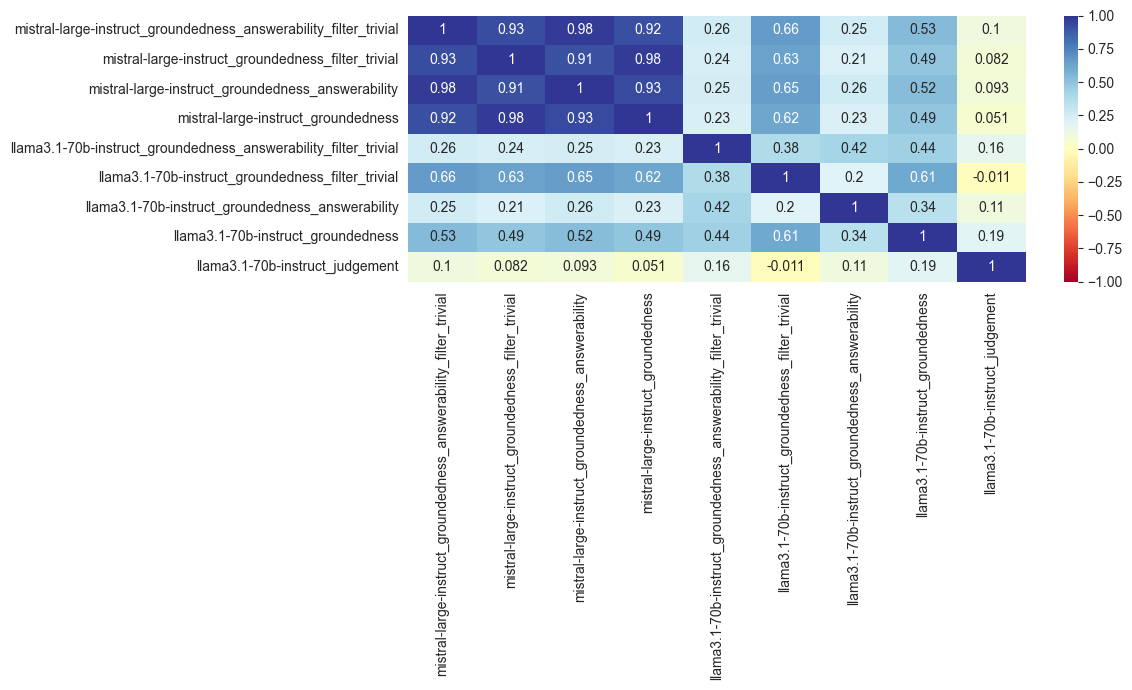

In [8]:
context_rel_cols = [col for col in sovanta_cols if "groundedness" in col] + ["meta--llama3.1-70b-instruct_judgement"]
labels = [j.split("--")[-1] for j in context_rel_cols]
corr_context = df_sovanta_gen[context_rel_cols].corr()
plt.figure(figsize=(12, 7))
ax1 = plt.gca()
sns.heatmap(
    corr_context,
    annot=True,
    cmap="RdYlBu",
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels,
    ax=ax1,
)
ax1.set_title("")
plt.tight_layout()
plt.show()

# 4. Answer Relevance
## 4.1 Wikieval

In [9]:
correlations = []
print("Average Values:")
for col in [col for col in wikieval_cols if "answer_relevance" in col]:
    print(f"{col}: {df_wikieval_gen[col].mean()}")
    corr = df_wikieval_gen["mistralai--mistral-large-instruct_judgement"].corr(df_wikieval_gen[col])
    correlations.append((col, corr))
correlations.sort(key=lambda x: x[1], reverse=True)
print("--------\nCorrelations:")
for col, corr in correlations:
    print(f"{col}: {corr}")

Average Values:
gpt-4o-mini_answer_relevance_with_cot: 1.0
gpt-4o-mini_answer_relevance: 1.0
gpt-4o_answer_relevance_with_cot: 0.9916666666666667
gpt-4o_answer_relevance: 1.0
meta--llama3.1-70b-instruct_answer_relevance_with_cot: 1.0
meta--llama3.1-70b-instruct_answer_relevance: 1.0
mistralai--mistral-large-instruct_answer_relevance_with_cot: 1.0
mistralai--mistral-large-instruct_answer_relevance: 0.9986111111111111
anthropic--claude-3.7-sonnet_answer_relevance_with_cot: 0.9930555555555555
anthropic--claude-3.7-sonnet_answer_relevance: 0.9888888888888889
--------
Correlations:
gpt-4o-mini_answer_relevance_with_cot: nan
gpt-4o-mini_answer_relevance: nan
gpt-4o_answer_relevance_with_cot: 0.003545452889933562
gpt-4o_answer_relevance: nan
meta--llama3.1-70b-instruct_answer_relevance_with_cot: nan
meta--llama3.1-70b-instruct_answer_relevance: nan
mistralai--mistral-large-instruct_answer_relevance_with_cot: nan
anthropic--claude-3.7-sonnet_answer_relevance_with_cot: 0.2252332044972985
anthro

/Users/johann.zapf/PycharmProjects/masterthesis/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/johann.zapf/PycharmProjects/masterthesis/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


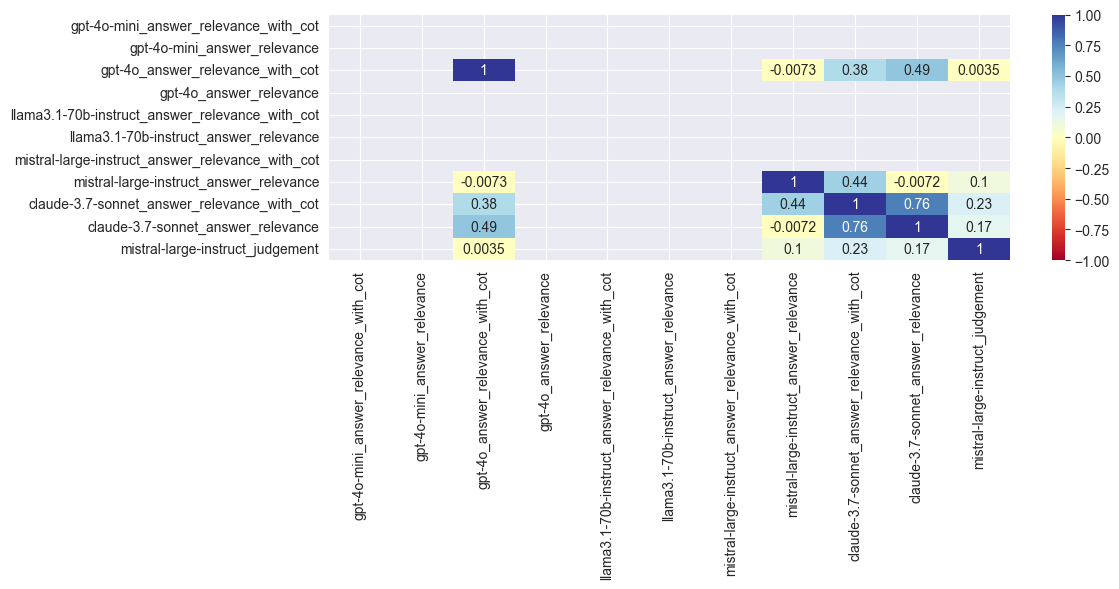

In [10]:
context_rel_cols = [col for col in wikieval_cols if "answer_relevance" in col] + [
    "mistralai--mistral-large-instruct_judgement"
]
labels = [j.split("--")[-1] for j in context_rel_cols]
corr_context = df_wikieval_gen[context_rel_cols].corr()
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.heatmap(
    corr_context,
    annot=True,
    cmap="RdYlBu",
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels,
    ax=ax1,
)
ax1.set_title("")
plt.tight_layout()
plt.show()

## 4.2 sovanta

In [11]:
correlations = []
print("Average Values:")
for col in [col for col in sovanta_cols if "answer_relevance" in col]:
    print(f"{col}: {df_sovanta_gen[col].mean()}")
    corr = df_sovanta_gen["meta--llama3.1-70b-instruct_judgement"].corr(df_sovanta_gen[col])
    correlations.append((col, corr))
correlations.sort(key=lambda x: x[1], reverse=True)
print("--------\nCorrelations:")
for col, corr in correlations:
    print(f"{col}: {corr}")

Average Values:
mistralai--mistral-large-instruct_answer_relevance_with_cot: 0.8564814814814815
mistralai--mistral-large-instruct_answer_relevance: 0.8719135802469135
meta--llama3.1-70b-instruct_answer_relevance_with_cot: 0.8248062015503875
meta--llama3.1-70b-instruct_answer_relevance: 0.8611111111111112
--------
Correlations:
mistralai--mistral-large-instruct_answer_relevance: -0.03814220800971676
mistralai--mistral-large-instruct_answer_relevance_with_cot: -0.06047011406065386
meta--llama3.1-70b-instruct_answer_relevance_with_cot: -0.10477795438216961
meta--llama3.1-70b-instruct_answer_relevance: -0.1630429179776242


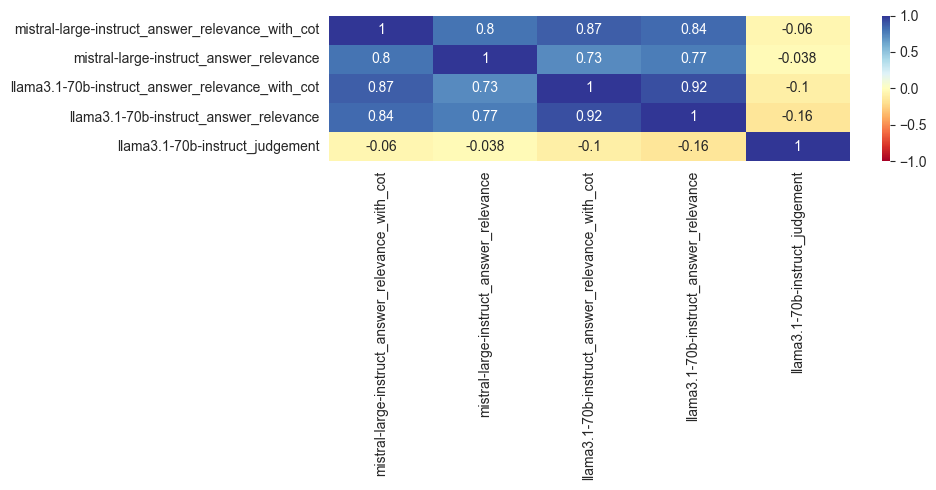

In [12]:
context_rel_cols = [col for col in sovanta_cols if "answer_relevance" in col] + [
    "meta--llama3.1-70b-instruct_judgement"
]
labels = [j.split("--")[-1] for j in context_rel_cols]
corr_context = df_sovanta_gen[context_rel_cols].corr()
plt.figure(figsize=(10, 5))
ax1 = plt.gca()
sns.heatmap(
    corr_context,
    annot=True,
    cmap="RdYlBu",
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels,
    ax=ax1,
)
ax1.set_title("")
plt.tight_layout()
plt.show()

sovanta answer relevance without unanswerable questions

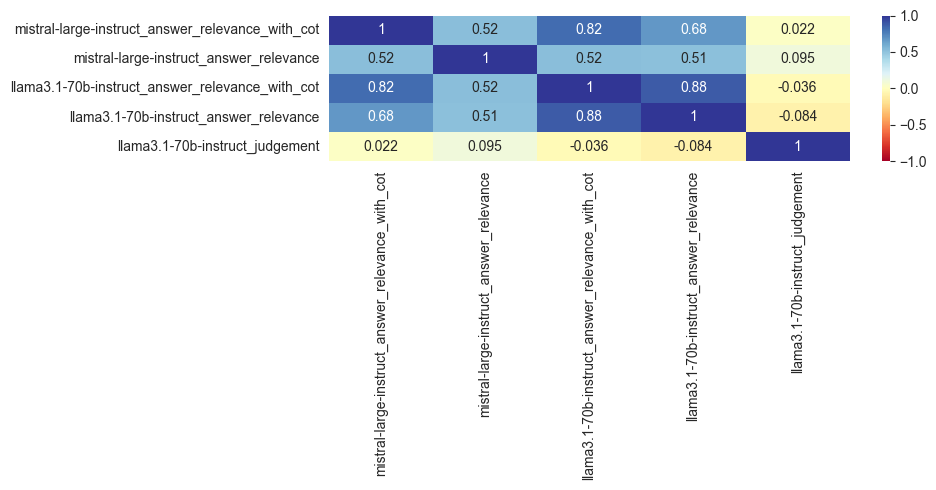

In [13]:
df_sovanta_gen_f = df_sovanta_gen[df_sovanta_gen["cluster"] != "UNKNOWN"]

context_rel_cols = [col for col in sovanta_cols if "answer_relevance" in col] + [
    "meta--llama3.1-70b-instruct_judgement"
]
labels = [j.split("--")[-1] for j in context_rel_cols]
corr_context = df_sovanta_gen_f[context_rel_cols].corr()
plt.figure(figsize=(10, 5))
ax1 = plt.gca()
sns.heatmap(
    corr_context,
    annot=True,
    cmap="RdYlBu",
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels,
    ax=ax1,
)
ax1.set_title("")
plt.tight_layout()
plt.show()

# 5. RAG Triad Score
## 5.1 Wikieval

In [14]:
answer_cols = [col for col in df_wikieval_gen.columns if "answer_relevance" in col and "_meta" not in col]
groundedness_cols = [col for col in df_wikieval_gen.columns if "groundedness" in col and "_meta" not in col]
context_col = "gpt-4o_context_relevance_with_cot"
results = []

# Define a list of possible weight combinations (summing to 1)
weight_options = [
    (1 / 3, 1 / 3, 1 / 3),
    (0.5, 0.5, 0),
    (0.5, 0.25, 0.25),
    (0.25, 0.5, 0.25),
    (0.25, 0.25, 0.5),
    (0.75, 0.25, 0),
    (0.25, 0.75, 0),
]

# Loop through each (answer, groundedness) pair
for a_col in answer_cols:
    for g_col in groundedness_cols:
        for w1, w2, w3 in weight_options:
            weighted_avg = w1 * df_wikieval_gen[a_col] + w2 * df_wikieval_gen[g_col] + w3 * df_wikieval_gen[context_col]
            corr = weighted_avg.corr(df_wikieval_gen["mistralai--mistral-large-instruct_judgement"])
            results.append(
                {
                    "answer_relevance": a_col,
                    "groundedness": g_col,
                    "context_relevance": context_col,
                    "weights": (w1, w2, w3),
                    "correlation": corr,
                }
            )

results_sorted = sorted(results, key=lambda x: x["correlation"], reverse=True)
ranked_df = pd.DataFrame(results_sorted)
ranked_df.head(10)

,answer_relevance,groundedness,context_relevance,weights,correlation
0,anthropic--claude-3.7-sonnet_answer_relevance_...,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.5, 0.25, 0.25)",0.289744
1,anthropic--claude-3.7-sonnet_answer_relevance_...,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.3333333333333333, 0.3333333333333333, 0.333...",0.282322
2,anthropic--claude-3.7-sonnet_answer_relevance_...,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.25, 0.25, 0.5)",0.270230
3,anthropic--claude-3.7-sonnet_answer_relevance,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.25, 0.25, 0.5)",0.264999
4,anthropic--claude-3.7-sonnet_answer_relevance,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.3333333333333333, 0.3333333333333333, 0.333...",0.241200
5,anthropic--claude-3.7-sonnet_answer_relevance_...,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.25, 0.5, 0.25)",0.240341
6,anthropic--claude-3.7-sonnet_answer_relevance_...,meta--llama3.1-70b-instruct_groundedness_filte...,gpt-4o_context_relevance_with_cot,"(0.5, 0.25, 0.25)",0.227487
7,anthropic--claude-3.7-sonnet_answer_relevance,meta--llama3.1-70b-instruct_groundedness_filte...,gpt-4o_context_relevance_with_cot,"(0.25, 0.25, 0.5)",0.221037
8,anthropic--claude-3.7-sonnet_answer_relevance,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.25, 0.5, 0.25)",0.217772
9,anthropic--claude-3.7-sonnet_answer_relevance,anthropic--claude-3.7-sonnet_groundedness_filt...,gpt-4o_context_relevance_with_cot,"(0.5, 0.25, 0.25)",0.217099


## 5.2 sovanta

In [15]:
answer_cols = [col for col in df_sovanta_gen.columns if "answer_relevance" in col and "_meta" not in col]
groundedness_cols = [col for col in df_sovanta_gen.columns if "groundedness" in col and "_meta" not in col]
context_col = "meta--llama3.1-70b-instruct_context_relevance_with_cot"
results = []

# Define a list of possible weight combinations (summing to 1)
weight_options = [
    (1 / 3, 1 / 3, 1 / 3),
    (0.5, 0.5, 0),
    (0.5, 0.25, 0.25),
    (0.25, 0.5, 0.25),
    (0.25, 0.25, 0.5),
    (0.75, 0.25, 0),
    (0.25, 0.75, 0),
]

# Loop through each (answer, groundedness) pair
for a_col in answer_cols:
    for g_col in groundedness_cols:
        for w1, w2, w3 in weight_options:
            weighted_avg = w1 * df_sovanta_gen[a_col] + w2 * df_sovanta_gen[g_col] + w3 * df_sovanta_gen[context_col]
            corr = weighted_avg.corr(df_sovanta_gen["meta--llama3.1-70b-instruct_judgement"])
            results.append(
                {
                    "answer_relevance": a_col,
                    "groundedness": g_col,
                    "context_relevance": context_col,
                    "weights": (w1, w2, w3),
                    "correlation": corr,
                }
            )

results_sorted = sorted(results, key=lambda x: x["correlation"], reverse=True)
ranked_df = pd.DataFrame(results_sorted)
ranked_df.head(10)

,answer_relevance,groundedness,context_relevance,weights,correlation
0,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.169427
1,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.164284
2,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.152769
3,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.151503
4,meta--llama3.1-70b-instruct_answer_relevance_w...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.142894
5,meta--llama3.1-70b-instruct_answer_relevance_w...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.138678
6,meta--llama3.1-70b-instruct_answer_relevance,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.134145
7,meta--llama3.1-70b-instruct_answer_relevance,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.133216
8,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.5, 0.5, 0)",0.121497
9,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.5, 0.5, 0)",0.116082


What happens if we ignore unknown questions?

In [16]:
df_s_filtered = df_sovanta_gen[df_sovanta_gen["cluster"] != "UNKNOWN"]
answer_cols = [col for col in df_s_filtered.columns if "answer_relevance" in col and "_meta" not in col]
groundedness_cols = [col for col in df_s_filtered.columns if "groundedness" in col and "_meta" not in col]
context_col = "meta--llama3.1-70b-instruct_context_relevance_with_cot"
results = []

# Define a list of possible weight combinations (summing to 1)
weight_options = [
    (1 / 3, 1 / 3, 1 / 3),
    (0.5, 0.5, 0),
    (0.5, 0.25, 0.25),
    (0.25, 0.5, 0.25),
    (0.25, 0.5, 0.25),
    (0.75, 0.25, 0),
    (0.25, 0.75, 0),
]

# Loop through each (answer, groundedness) pair
for a_col in answer_cols:
    for g_col in groundedness_cols:
        for w1, w2, w3 in weight_options:
            weighted_avg = w1 * df_s_filtered[a_col] + w2 * df_s_filtered[g_col] + w3 * df_s_filtered[context_col]
            corr = weighted_avg.corr(df_s_filtered["meta--llama3.1-70b-instruct_judgement"])
            results.append(
                {
                    "answer_relevance": a_col,
                    "groundedness": g_col,
                    "context_relevance": context_col,
                    "weights": (w1, w2, w3),
                    "correlation": corr,
                }
            )

results_sorted = sorted(results, key=lambda x: x["correlation"], reverse=True)
ranked_df = pd.DataFrame(results_sorted)
ranked_df.head(10)

,answer_relevance,groundedness,context_relevance,weights,correlation
0,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.311965
1,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.5, 0.5, 0)",0.305029
2,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.300583
3,meta--llama3.1-70b-instruct_answer_relevance_w...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.281105
4,meta--llama3.1-70b-instruct_answer_relevance,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.276511
5,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.5, 0.5, 0)",0.274591
6,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.5, 0.25)",0.253344
7,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.5, 0.25)",0.253344
8,mistralai--mistral-large-instruct_answer_relev...,mistralai--mistral-large-instruct_groundedness...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",0.239879
9,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.5, 0.25)",0.236098


--> unanswerable questions work very bad, lets look at them in detail:

In [17]:
df_s_filtered = df_sovanta_gen[df_sovanta_gen["cluster"] == "UNKNOWN"]
answer_cols = [col for col in df_s_filtered.columns if "answer_relevance" in col and "_meta" not in col]
groundedness_cols = [col for col in df_s_filtered.columns if "groundedness" in col and "_meta" not in col]
context_col = "meta--llama3.1-70b-instruct_context_relevance_with_cot"
results = []

# Define a list of possible weight combinations (summing to 1)
weight_options = [
    (1 / 3, 1 / 3, 1 / 3),
    (0.5, 0.5, 0),
    (0.5, 0.25, 0.25),
    (0.25, 0.5, 0.25),
    (0.25, 0.5, 0.25),
    (0.75, 0.25, 0),
    (0.25, 0.75, 0),
]

# Loop through each (answer, groundedness) pair
for a_col in answer_cols:
    for g_col in groundedness_cols:
        for w1, w2, w3 in weight_options:
            weighted_avg = w1 * df_s_filtered[a_col] + w2 * df_s_filtered[g_col] + w3 * df_s_filtered[context_col]
            corr = weighted_avg.corr(df_s_filtered["meta--llama3.1-70b-instruct_judgement"])
            results.append(
                {
                    "answer_relevance": a_col,
                    "groundedness": g_col,
                    "context_relevance": context_col,
                    "weights": (w1, w2, w3),
                    "correlation": corr,
                }
            )

results_sorted = sorted(results, key=lambda x: x["correlation"], reverse=True)
ranked_df = pd.DataFrame(results_sorted)
ranked_df.head(10)

,answer_relevance,groundedness,context_relevance,weights,correlation
0,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",-0.043461
1,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",-0.059522
2,meta--llama3.1-70b-instruct_answer_relevance_w...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",-0.074241
3,meta--llama3.1-70b-instruct_answer_relevance,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.75, 0)",-0.075019
4,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.5, 0.5, 0)",-0.211354
5,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.5, 0.25)",-0.236584
6,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.5, 0.25)",-0.236584
7,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.5, 0.5, 0)",-0.252611
8,meta--llama3.1-70b-instruct_answer_relevance_w...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.5, 0.5, 0)",-0.259264
9,mistralai--mistral-large-instruct_answer_relev...,meta--llama3.1-70b-instruct_groundedness_answe...,meta--llama3.1-70b-instruct_context_relevance_...,"(0.25, 0.5, 0.25)",-0.259576


# 6. Overview
## 6.1 Wikieval

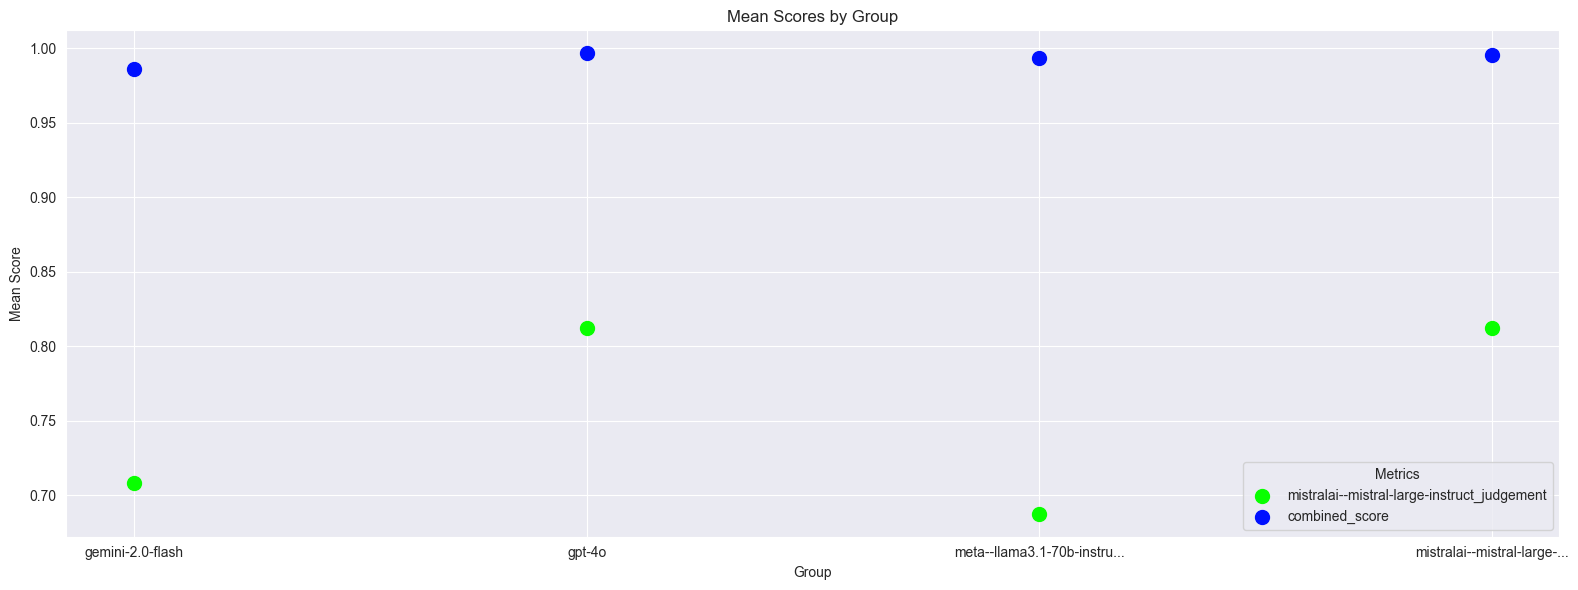

Overall mean values:
combined_score                                 0.992996
mistralai--mistral-large-instruct_judgement    0.755208
dtype: float64


In [18]:
df_wikieval_gen["combined_score"] = (
    0.5 * df_wikieval_gen["anthropic--claude-3.7-sonnet_answer_relevance_with_cot"]
    + 0.25 * df_wikieval_gen["anthropic--claude-3.7-sonnet_groundedness_filter_trivial"]
    + 0.25 * df_wikieval_gen["gpt-4o_context_relevance_with_cot"]
)
plot_scores(
    df_wikieval_gen,
    "llm",
    columns_to_plot=["mistralai--mistral-large-instruct_judgement", "combined_score"],
)

## 6.2 sovanta

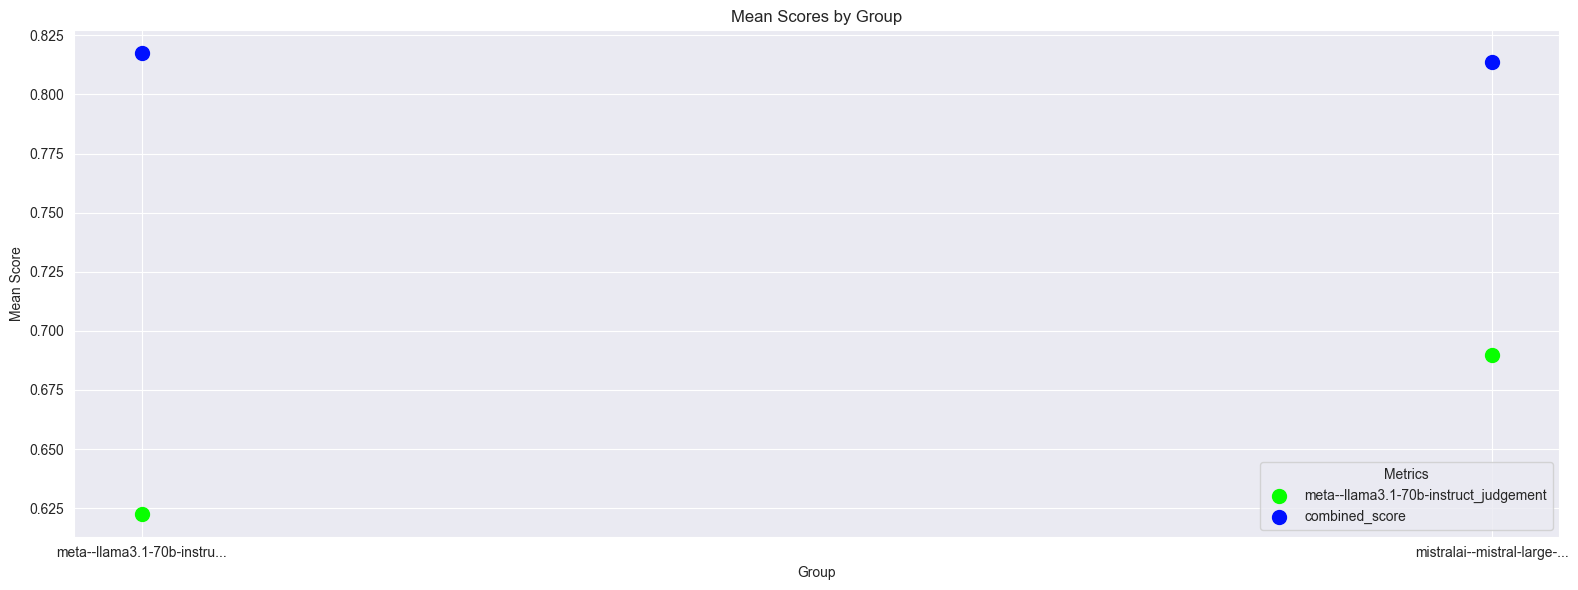

Overall mean values:
combined_score                           0.815556
meta--llama3.1-70b-instruct_judgement    0.656250
dtype: float64


In [19]:
df_sovanta_gen["combined_score"] = (
    0.25 * df_sovanta_gen["mistralai--mistral-large-instruct_answer_relevance"]
    + 0.75 * df_sovanta_gen["meta--llama3.1-70b-instruct_groundedness"]
)
plot_scores(
    df_sovanta_gen,
    "llm",
    columns_to_plot=["meta--llama3.1-70b-instruct_judgement", "combined_score"],
)

# 7. Conclusions
Wikieval
- the correlation between groundedness and judgement is non-existent, and even moderately negative (up to -0.41)
- the groundedness agreement between the models varies greatly, and is more consistent within the model than across the configuration (filter_trivial=True|False)
- answer relevance is almost always 1, making any look at correlations difficult
- Claude-3.7 with CoT at least has a correlation of 0.23 with judgement
- **the average of Groundedness (filter_trivial=True) and Answer Relevance (with CoT) for Claude-3.7 is the only combined score with a correlation above 0 at 0.17**
- the combined scores are barely correlated (exception: GPT-4o-mini and Mistral-Large)

sovanta
- Mistral-Large has the highest groundedness correlation with judgement at 0.22
- Filtering out trivial statements makes the groundedness results slightly better for Mistral, and way worse for Llama
- Mistral with CoT has the highest answer relevance correlation at 0.25
- CoT does not really improve answer relevance results
- The correlation between the models is relatively high for answer relevance, although mistral requires CoT to keep up
- **the best average is 0.22 for Mistral with groundedness_filter_trivial and answer_relevance (no CoT)**
- the combined scores are correlated at 0.72

General
- all models computed the scores relatively reliably, only the GPT models had some problems because of prompt filtering
- the average groundedness score is very high (>0.95 for all models)
- the average answer relevance score is very high (>0.99) -> this can also be interpreted as the ability of current LLMs to precisely handle user questions
- all of the correlations are pretty low
- open Problem: abstentions -> how to handle "I don't know answers" -> next notebook
